In [2]:
#question 1:
import pandas as pd
data=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/X_Y_Sinusoid_Data.csv")
data.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [4]:
degree=20
pf=PolynomialFeatures(degree)
lr=LinearRegression()

x_data=data[["x"]]
y_data=data["y"]

In [5]:
x_data_df=pd.DataFrame(x_data)
y_data_df=pd.DataFrame(y_data)

data=pf.fit_transform(x_data_df)


In [6]:
x_train,x_test,y_train,y_test=train_test_split(data,y_data_df,test_size=0.2,random_state=42)

In [7]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_score=r2_score(y_test,y_pred)
r2_score


-16947894869.665455

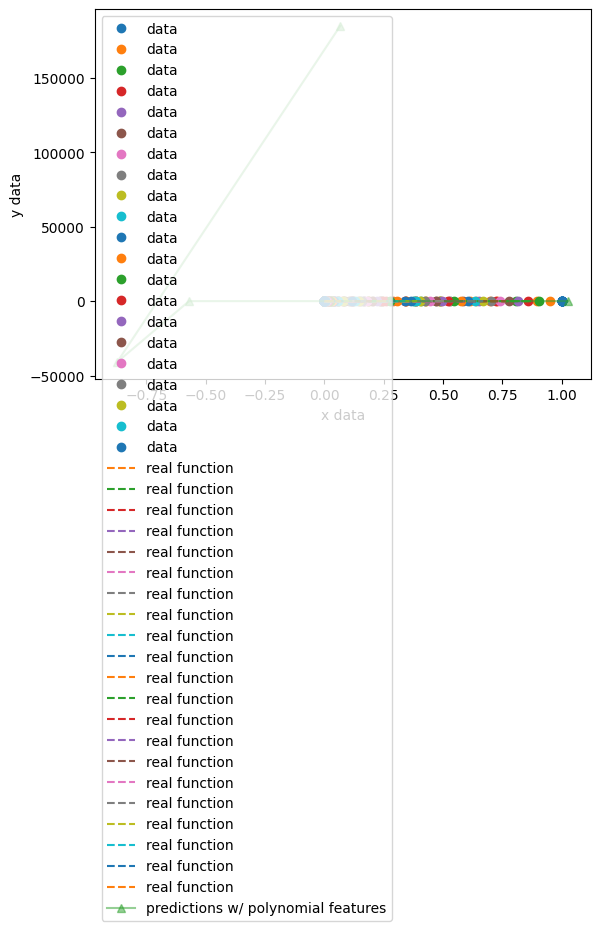

In [8]:
plt.plot(x_train,y_train, marker='o', ls='', label='data', alpha=1)
plt.plot(x_test,y_test, ls='--', label='real function')
plt.plot(y_test, y_pred, marker='^', alpha=.5, label='predictions w/ polynomial features')
plt.legend()
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

In [9]:
#now using ridge regression:
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score

In [10]:
#now ridge 
# Initialize Ridge model with regularization strength alpha
rr = Ridge(alpha=1)

# Train the model
rr.fit(x_train, y_train)

# Predict on test data
y_pred_rr = rr.predict(x_test)

# Calculate R² score
r2= r2_score(y_test, y_pred_rr)

# Display result
print("R² score (Ridge):", r2)

R² score (Ridge): 0.5858330332891665


In [11]:
#now for lasso:
from sklearn.metrics import r2_score
ll=Lasso(alpha=1)
ll.fit(x_train,y_train)
y_pred_ll=ll.predict(x_test)
r2=r2_score(y_test,y_pred_ll)
print("R² score (Lasso):", r2)

R² score (Lasso): -0.13049986757507548


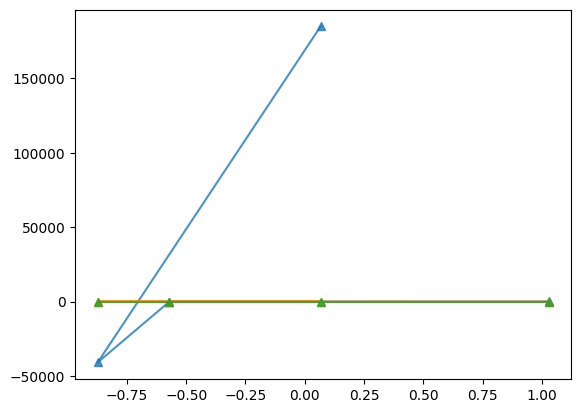

In [12]:
plt.plot(y_test, y_pred, label='linear regression', marker='^', alpha=0.8)
plt.plot(y_test, y_pred_rr, label='ridge regression', marker='^', alpha=.8)
plt.plot(y_test, y_pred_ll, label='lasso regression', marker='^', alpha=.8)

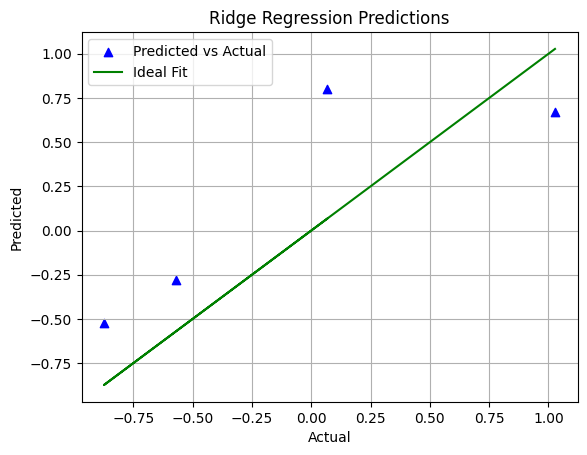

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rr, color='blue', marker='^', label='Predicted vs Actual')
plt.plot(y_test, y_test, color='green', label='Ideal Fit')  # Perfect fit line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Ridge Regression Predictions")
plt.legend()
plt.grid(True)
plt.show()


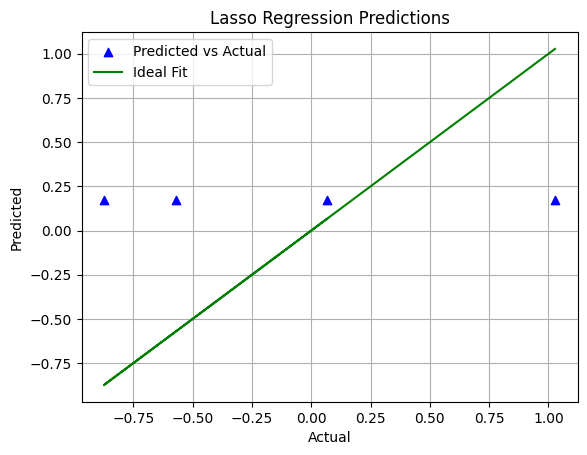

In [14]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_ll, color='blue', marker='^', label='Predicted vs Actual')
plt.plot(y_test, y_test, color='green', label='Ideal Fit')  # Perfect fit line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Lasso Regression Predictions")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
#question 2:
data=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/Ames_Housing_Sales.csv")
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,NaN,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0


In [16]:
null_count=data.isnull().sum()
data=data.dropna(subset=["Alley"])

In [17]:
null_count=data.isnull().sum()
null_count

1stFlrSF        0
2ndFlrSF        0
3SsnPorch       0
Alley           0
BedroomAbvGr    0
               ..
WoodDeckSF      0
YearBuilt       0
YearRemodAdd    0
YrSold          0
SalePrice       0
Length: 80, dtype: int64

In [18]:
#one hot-encoding:
data =pd.get_dummies(data, drop_first=True)
data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'SaleType_CWD', 'SaleType_ConLI', 'SaleType_New', 'SaleType_WD'],
      dtype='object', length=146)

In [19]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_ConLI,SaleType_New,SaleType_WD
21,1108.0,0.0,0.0,3,0.0,0.0,0,0,637.0,205.0,...,False,False,False,False,True,False,False,False,False,True
30,649.0,668.0,0.0,3,0.0,0.0,0,0,649.0,172.0,...,True,False,False,False,True,False,False,False,False,True
54,983.0,756.0,0.0,3,649.0,0.0,1,0,321.0,0.0,...,False,False,False,False,False,False,False,False,False,True
76,682.0,548.0,0.0,2,0.0,0.0,0,0,440.0,128.0,...,False,False,False,False,True,False,False,False,False,True
84,612.0,612.0,0.0,2,0.0,0.0,0,0,612.0,0.0,...,False,False,False,False,False,True,False,False,True,False


In [20]:
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)

In [21]:
data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_ConLI,SaleType_New,SaleType_WD
21,1108.0,0.0,0.0,3,0.0,0.0,0,0,637.0,205.0,...,0,0,0,0,1,0,0,0,0,1
30,649.0,668.0,0.0,3,0.0,0.0,0,0,649.0,172.0,...,1,0,0,0,1,0,0,0,0,1
54,983.0,756.0,0.0,3,649.0,0.0,1,0,321.0,0.0,...,0,0,0,0,0,0,0,0,0,1
76,682.0,548.0,0.0,2,0.0,0.0,0,0,440.0,128.0,...,0,0,0,0,1,0,0,0,0,1
84,612.0,612.0,0.0,2,0.0,0.0,0,0,612.0,0.0,...,0,0,0,0,0,1,0,0,1,0


In [22]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.3,random_state=42)


In [23]:
skewness = data.skew(numeric_only=True)
more_skewed_cols = skewness[skewness >= 0.75]
print("Columns with skewness > 0.75:\n", more_skewed_cols)
print("List of columns are:",more_skewed_cols.index.tolist())
print("Number of skewed columns:",len(more_skewed_cols.index.tolist()))

Columns with skewness > 0.75:
 BsmtFinSF1               1.460595
BsmtFinSF2               5.219830
BsmtFullBath             1.471023
BsmtHalfBath             5.029200
EnclosedPorch            1.311889
                           ...   
SaleCondition_Family     5.029200
SaleCondition_Partial    3.023352
SaleType_CWD             9.055385
SaleType_ConLI           9.055385
SaleType_New             3.023352
Length: 97, dtype: float64
List of columns are: ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'EnclosedPorch', 'Fireplaces', 'GrLivArea', 'KitchenAbvGr', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'BsmtCond_Gd', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType2_LwQ', 'BsmtQual_Gd', 'BsmtQual_TA', 'Condition1_Feedr', 'Condition1_PosN', 'Electrical_Fus

In [24]:
from scipy.stats import boxcox

skewness = data.skew(numeric_only=True)
more_skewed_cols = skewness[skewness >= 0.75].index.tolist()

data_bc = data.copy()

for col in more_skewed_cols:
    # Box-Cox requires all positive values
    # So add a small constant if there are zeros or negative values
    if (data_bc[col] <= 0).any():
        data_bc[col] = data_bc[col] + abs(data_bc[col].min()) + 1
    data_bc[col],_= boxcox(data_bc[col])


In [28]:

import numpy as np
col="SalePrice"
x_data=data.drop(col,axis=1)
y_data=data[col]

In [29]:
print("NaNs in y_test:", np.isnan(y_test).sum())
print("NaNs in y_pred:", np.isnan(y_pred).sum())


NaNs in y_test: y    0
dtype: int64
NaNs in y_pred: 0


In [30]:
# Create a mask for non-NaN values in y_pred
mask = ~np.isnan(y_pred)
y_pred_clean=y_pred[mask]
y_test_clean=y_test[mask]

In [31]:
from sklearn.metrics import mean_squared_error
import numpy as np
def rsme(y_test_clean,y_pred_clean):
    return np.sqrt(mean_squared_error(y_test_clean,y_pred_clean))
lr.fit(x_train,y_train)
y_pred_clean=lr.predict(x_test)
root_mean_squ_error=rsme(y_test_clean,y_pred_clean)
print("Root mean square error is:",root_mean_squ_error)

Root mean square error is: 94717.0298076542


In [32]:
#Ridge regression :#RidgeCV
from sklearn.linear_model import RidgeCV
alphas=[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
ridgeCV=RidgeCV(alphas=alphas,cv=4).fit(x_train,y_train)
ridge_rsme=rsme(y_test_clean,ridgeCV.predict(x_test))
print(ridgeCV.alpha_,ridge_rsme)

0.3 0.5516525902115911


In [33]:
approx_price_error = np.expm1(ridge_rsme)
print("Approximate dollar error:", approx_price_error)

Approximate dollar error: 0.7361197429474051


In [34]:
#LassoCV:
from sklearn.linear_model import LassoCV
alphas2=np.array([1e-5, 5e-5, 0.0001, 0.0005])
lassoCV=LassoCV(alphas=alphas2,cv=3).fit(x_train,y_train)
lassoCV_rmse=rsme(y_test_clean,ridgeCV.predict(x_test))
print(lassoCV.alpha_, lassoCV_rmse)

0.0001 0.5516525902115911


C:\Users\Yashraj Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1664: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yashraj Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.675e-03, tolerance: 7.589e-04
  model = cd_fast.enet_coordinate_descent(
C:\Users\Yashraj Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing r

In [35]:
rmse_vals = [root_mean_squ_error, ridge_rsme, lassoCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,94717.029808
Ridge,0.551653
Lasso,0.551653


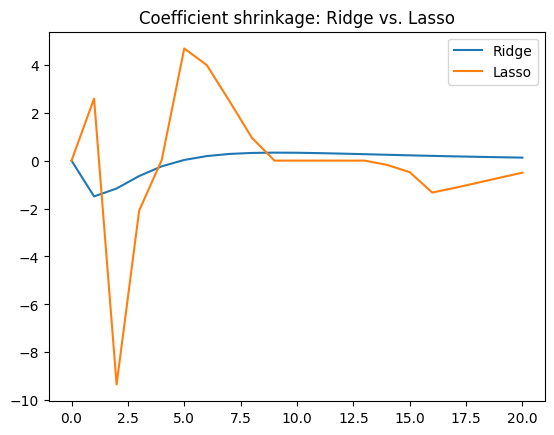

In [36]:
import matplotlib.pyplot as plt
plt.plot(ridgeCV.coef_, label='Ridge')
plt.plot(lassoCV.coef_, label='Lasso')
plt.legend()
plt.title("Coefficient shrinkage: Ridge vs. Lasso")
plt.show()


In [37]:
from sklearn.linear_model import SGDRegressor

model_parameters_dict = {
    'Linear': {'penalty': None},
    'Lasso': {'penalty': 'l1',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l2',
           'alpha': ridge_rsme}
}

new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    # following notation passes the dict items as arguments
    SGD = SGDRegressor(**parameters)
    SGD.fit(x_train, y_train)
    new_rmses[modellabel] = rsme(y_test, SGD.predict(x_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

C:\Users\Yashraj Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yashraj Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yashraj Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,RMSE,RMSE-SGD
Linear,94717.029808,0.640326
Ridge,0.551653,0.683128
Lasso,0.551653,0.641194


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

new_rsme={}
for modellabel,parameter in model_parameters_dict.items():
    SGD=SGDRegressor(**parameters)
    SGD.fit(x_train_scaled,y_train)
    new_rsme[modellabel]=rsme(y_test,SGD.predict(x_test_scaled))

rmse_df['RSME-SGD']=pd.Series(new_rsme)
rmse_df

C:\Users\Yashraj Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yashraj Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yashraj Sharma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,RMSE,RMSE-SGD,RSME-SGD
Linear,94717.029808,0.640326,0.641755
Ridge,0.551653,0.683128,0.636619
Lasso,0.551653,0.641194,0.638424
